In [25]:
from google.colab import drive
import pandas as pd
import os
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Monter Google Drive
drive.mount('/content/drive', force_remount= True) #force_remount = True permet d'avoir un fichier mis à jour si modifs sur google drive

file_path = '/content/drive/My Drive/Datascientest/Projet_accidents/Dataset/2019_2023/df_total_final.csv'
df_total_final=pd.read_csv("/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_total_final.csv")
df_temp = df_total_final.copy()
df_temp['date']= pd.to_datetime(df_temp['jour'].astype('str')+'/'+df_temp['mois'].astype('str')+'/'+df_temp['an'].astype('str')+ '/'+df_temp['hrmn'].astype('str'), dayfirst = True)
df_temp['an_mois_jour'] = df_temp['date'].dt.strftime('%Y-%m-%d')

df_temp = df_temp[['an_mois_jour', 'blessé_léger', 'blessé_hospitalisé', 'tué','dep']]

print(df_temp.head())
# On enregistre le df_total_final dans le drive partagé
df_temp.to_csv('/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_temp.csv', index=False)


df_temp.dep.value_counts()


Mounted at /content/drive


<ipython-input-25-e432d5bccc0a>:13: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total_final=pd.read_csv("/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_total_final.csv")


  an_mois_jour  blessé_léger  blessé_hospitalisé  tué dep
0   2019-11-30             2                   0    0  93
1   2019-11-30             1                   0    0  93
2   2019-11-28             2                   0    0  92
3   2019-11-30             1                   0    0  94
4   2019-11-30             1                   0    0  94


,count
dep,
75,25239
93,13955
13,12353
92,11882
94,11820
...,...
9,124
8,91
977,65


Il y a 25239 accidents dans le département 75, 13955 dans le 93, 12353 dans le 13, données suffisantes pour effectuer des prédictions. Nous allons tester des prédictions par analyse temporelle, sur le département 75. Cette analyse peut s'appliquer à tous les départements (s'ils ont suffisemment d'accidents recensés pour effectuer des prédictions).

In [15]:
df_temp = pd.read_csv('/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_temp.csv', index_col = 'an_mois_jour', parse_dates=True)
df_temp_75 = df_temp[df_temp['dep'] == '75']
df_temp_75.head()


,blessé_léger,blessé_hospitalisé,tué,dep
an_mois_jour,,,,
2019-10-24,1,0,0,75
2019-10-23,3,0,0,75
2019-10-23,1,0,0,75
2019-10-23,1,0,0,75
2019-10-24,1,0,0,75


In [18]:
df_temps_75 = df_temp_75.copy()
df_temp_75 = df_temp_75.drop('dep', axis = 1)
df_temp_75_resampled = df_temp_75.resample('D').sum().resample('M').sum()
df_temp_75_resampled.index
df_temp_75_resampled.head()

<ipython-input-18-baa825dd6dd5>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_temp_75_resampled = df_temp_75.resample('D').sum().resample('M').sum()


,blessé_léger,blessé_hospitalisé,tué
an_mois_jour,,,
2019-01-31,472,29,1
2019-02-28,434,36,3
2019-03-31,495,34,0
2019-04-30,509,42,5
2019-05-31,488,24,2


Evolution temporelle du nombre de blessés légers

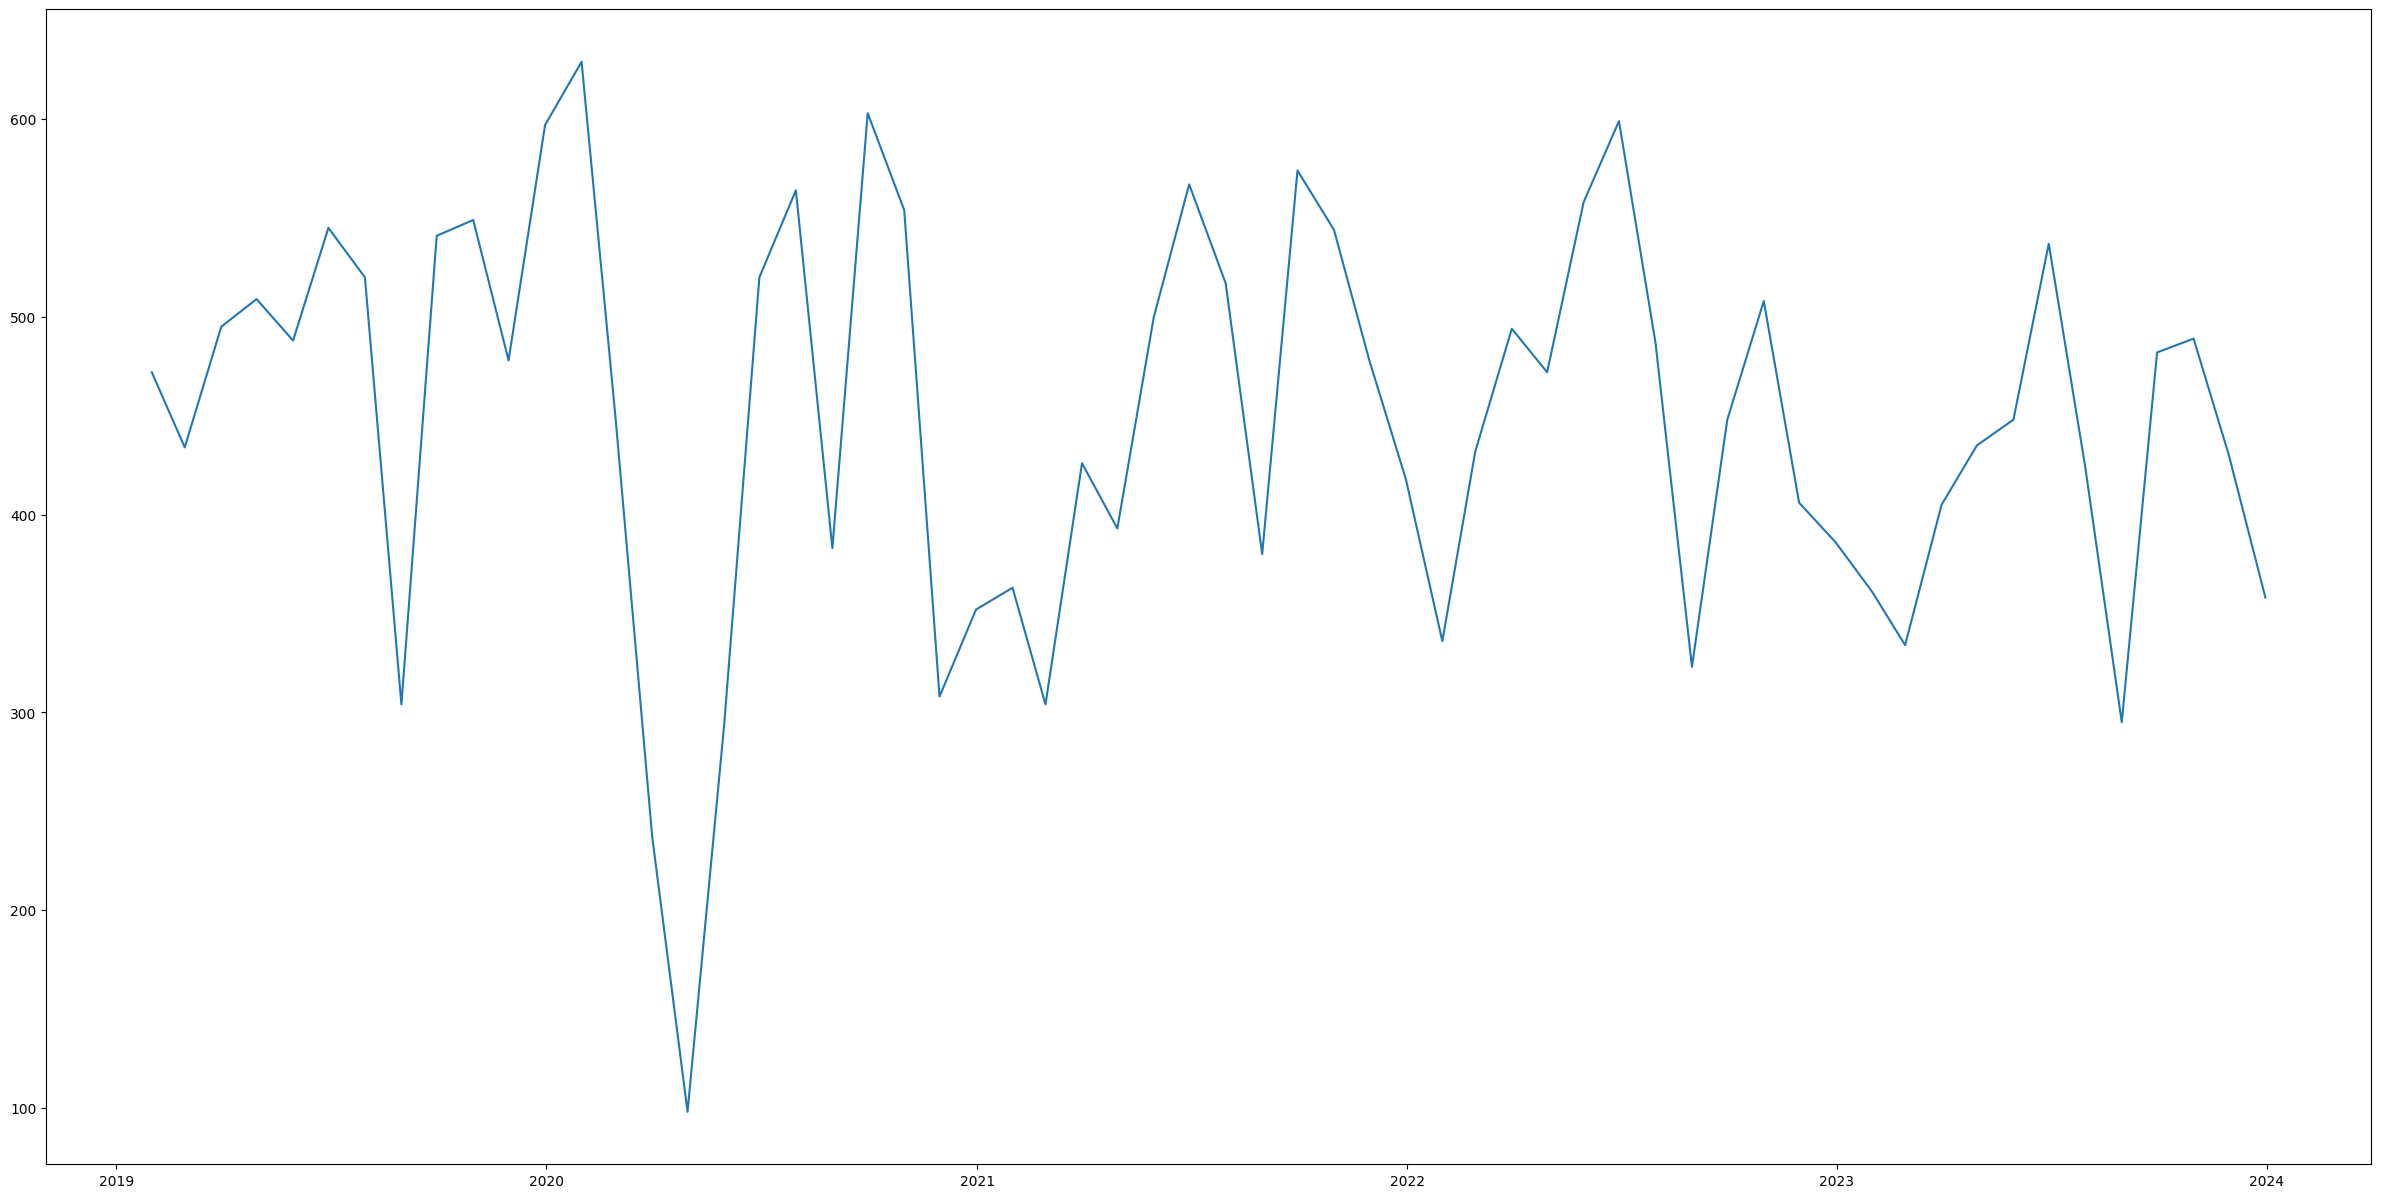

In [19]:
plt.figure(figsize = (30,15))
plt.plot('blessé_léger',data=df_temp_75_resampled)
plt.show()

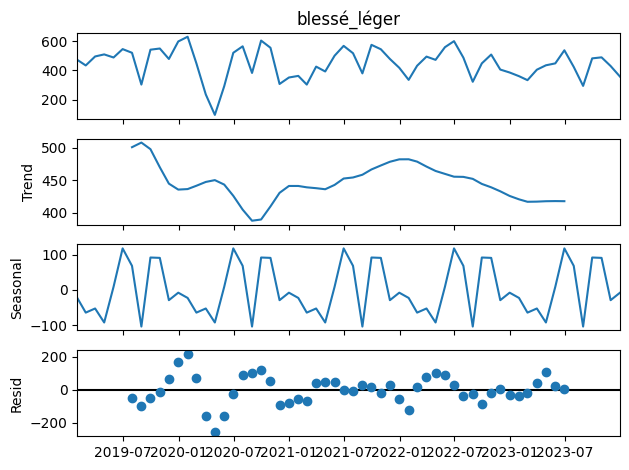

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

variable_hospitalisé= seasonal_decompose(df_temp_75_resampled['blessé_léger'])
variable_hospitalisé.plot()
plt.show();

Evolution temporelle du nombre de tués

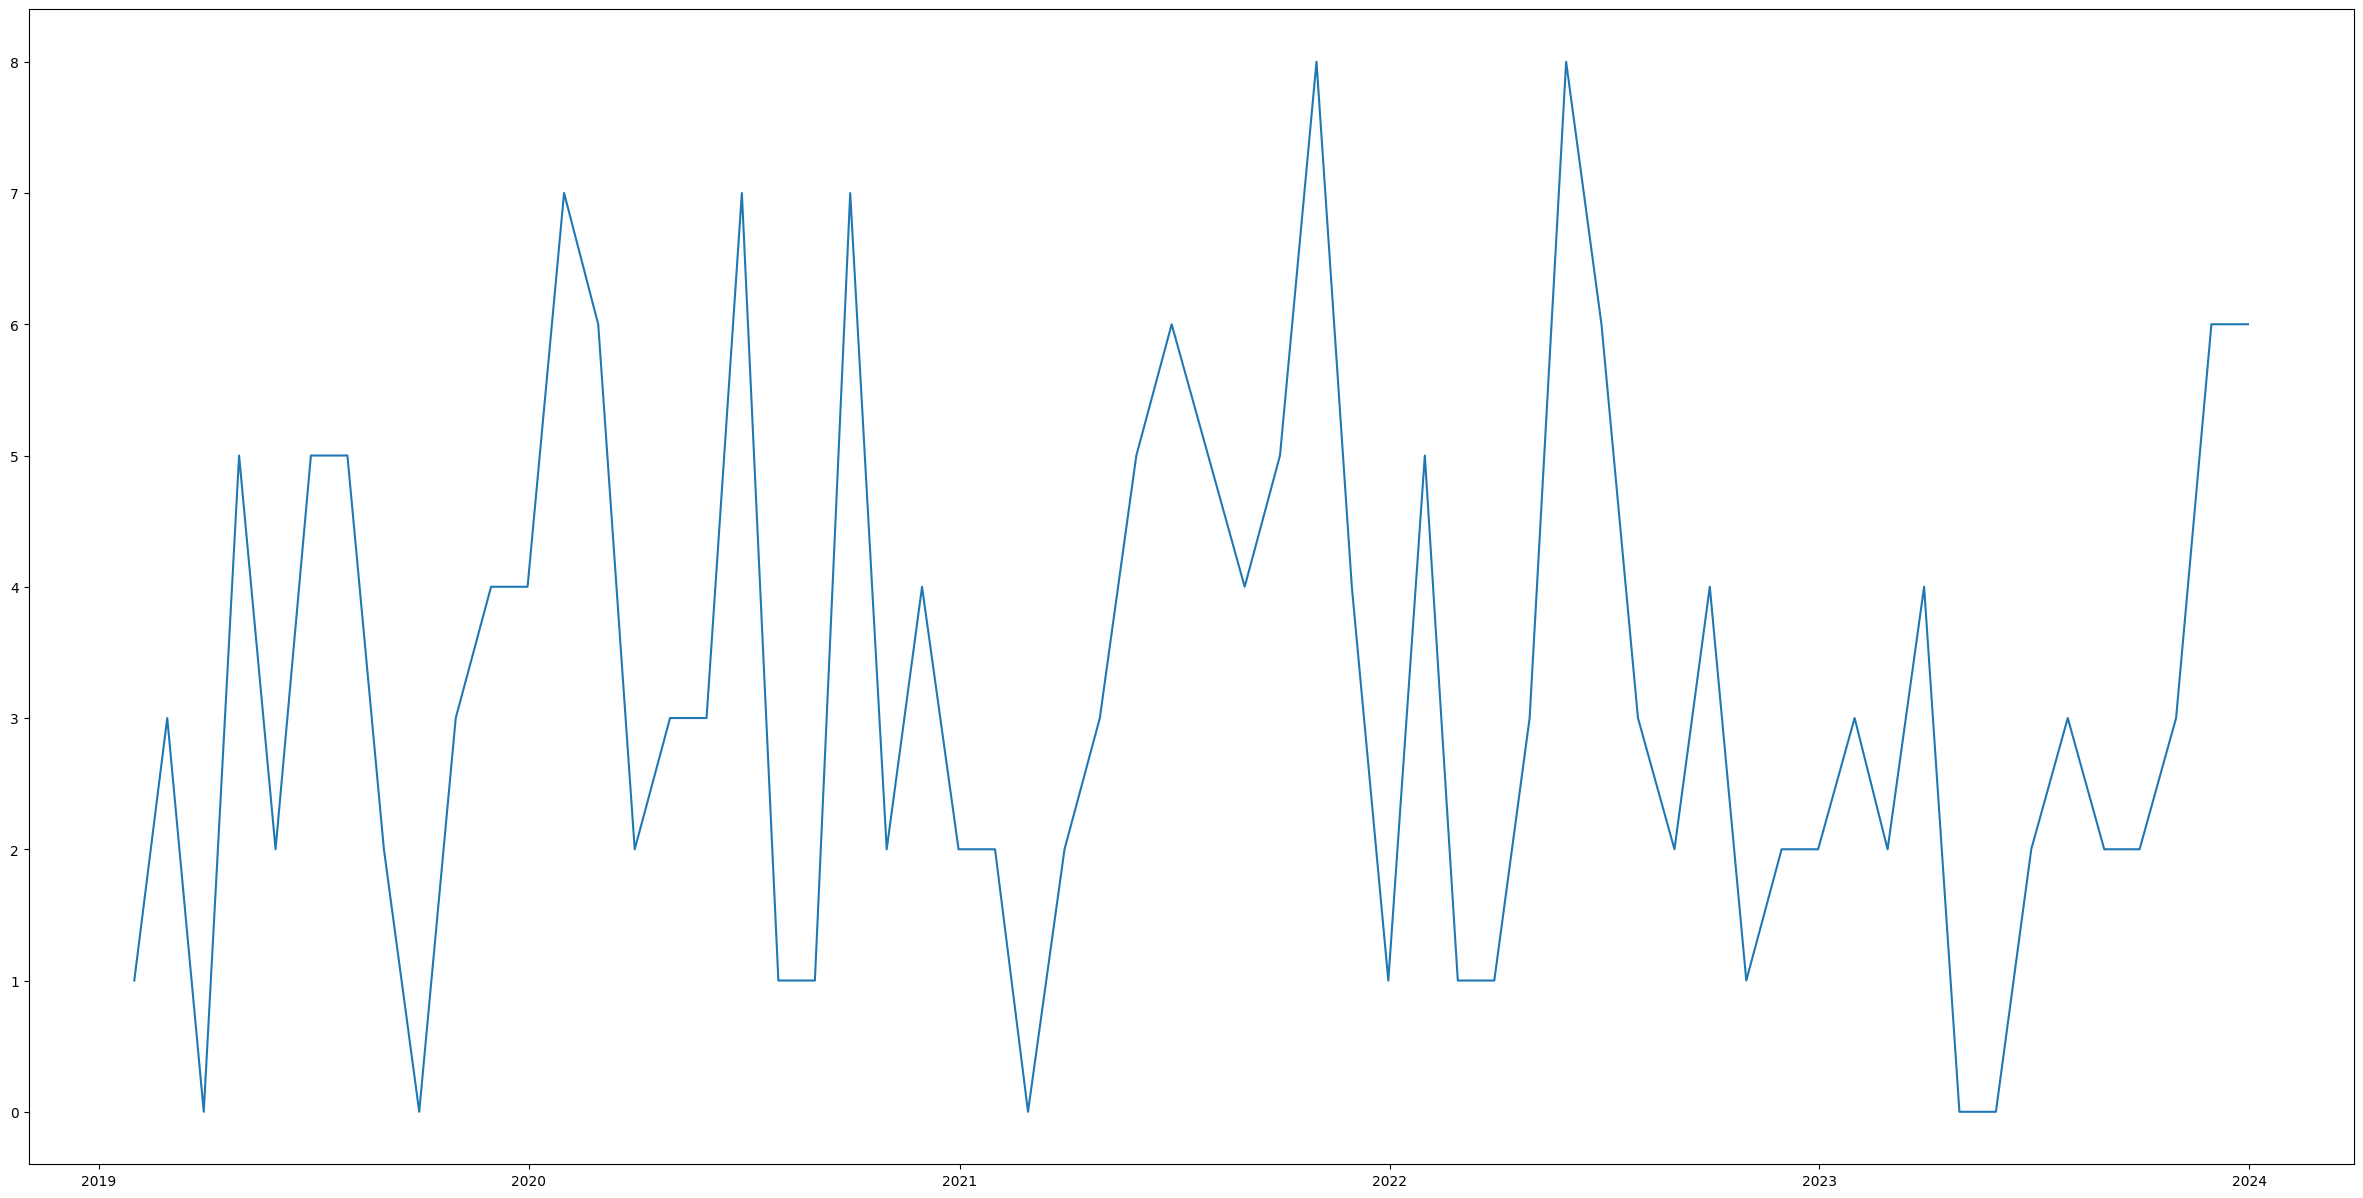

In [21]:
plt.figure(figsize = (30,15))
plt.plot('tué',data=df_temp_75_resampled)
plt.show()

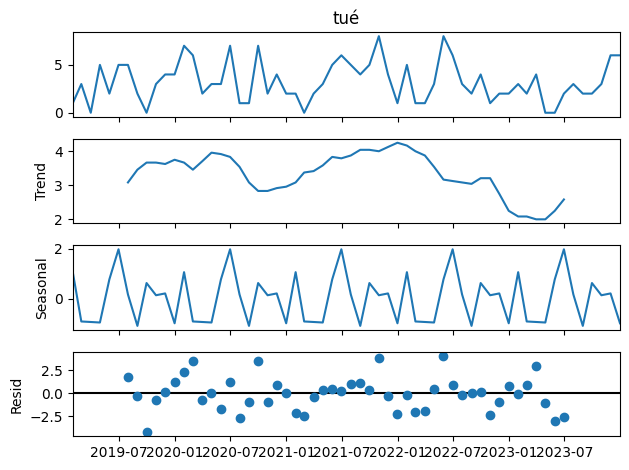

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

variable_hospitalisé= seasonal_decompose(df_temp_75_resampled['tué'])
variable_hospitalisé.plot()
plt.show();

Etude approfondie des blessés hospitalisés en vue d'une prédiction

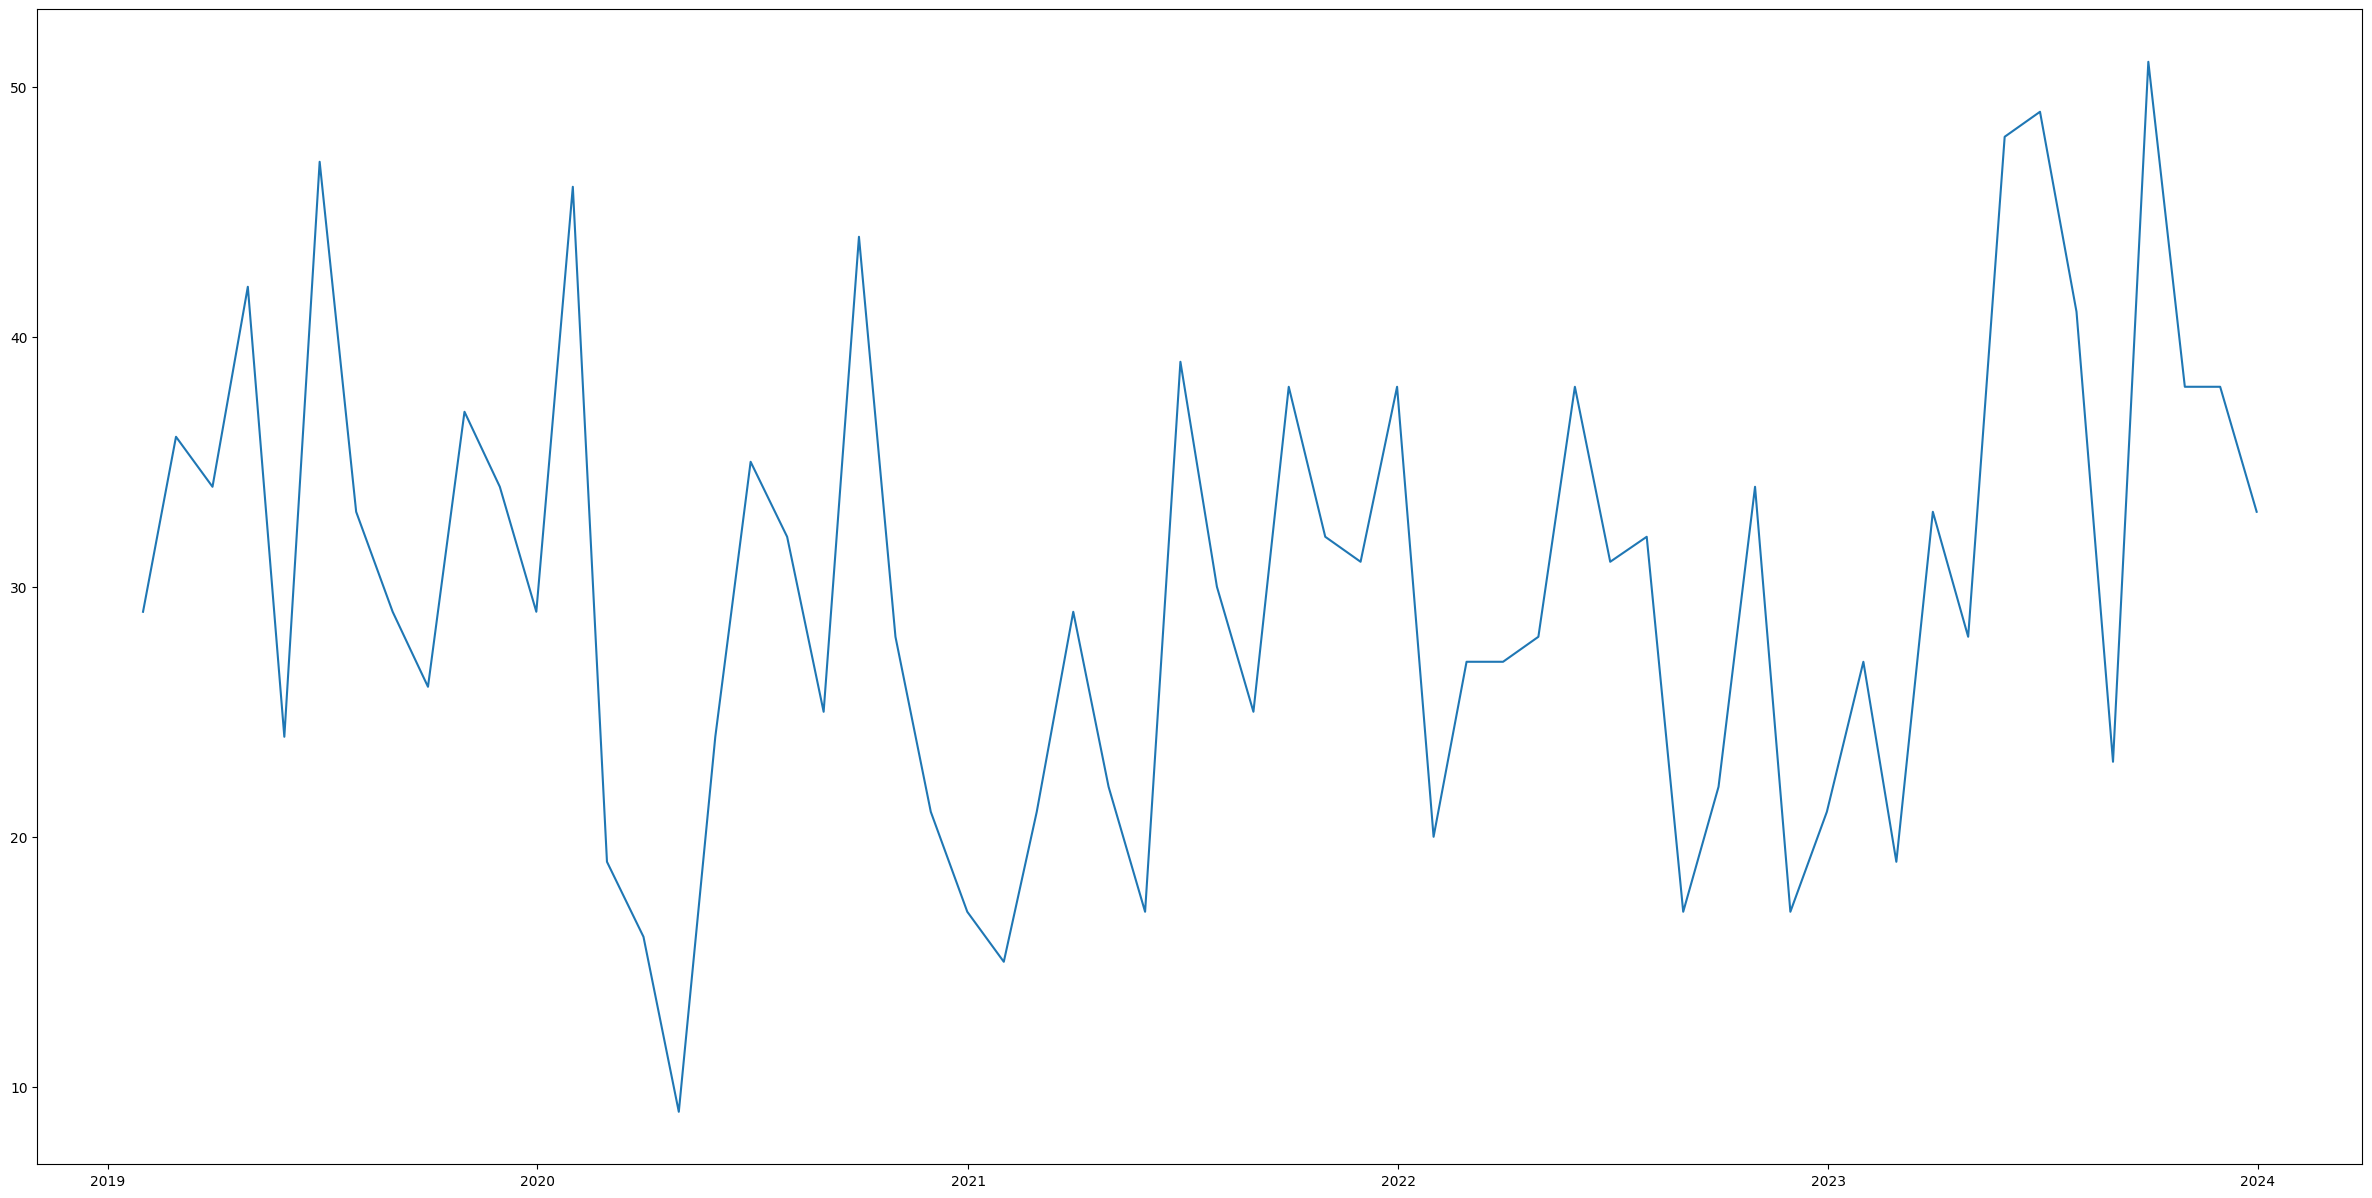

In [23]:
plt.figure(figsize = (30,15))
plt.plot('blessé_hospitalisé',data=df_temp_75_resampled)
plt.show()

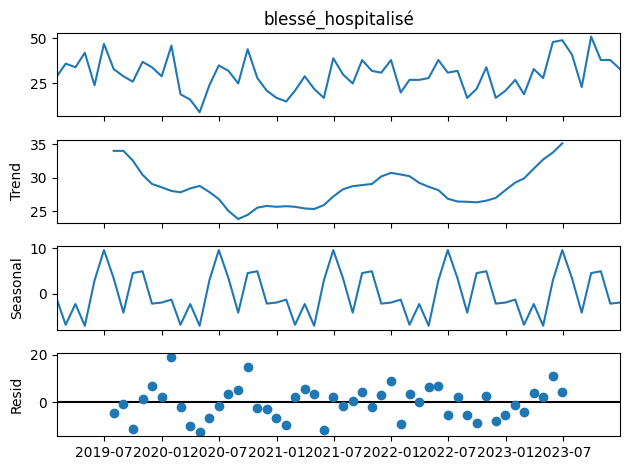

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

variable_hospitalisé= seasonal_decompose(df_temp_75_resampled['blessé_hospitalisé'])
variable_hospitalisé.plot()
plt.show();

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
# hospitalisé
df_temp_75_resampled['blessé_hospitalisé_lag1'] = df_temp_75_resampled['blessé_hospitalisé'].shift(1)
df_temp_75_resampled.head()

#léger
df_temp_75_resampled['blessé_léger_lag1'] = df_temp_75_resampled['blessé_léger'].shift(1)
df_temp_75_resampled.head()
#tué
df_temp_75_resampled['tué_lag1'] = df_temp_75_resampled['tué'].shift(1)
df_temp_75_resampled.head()

,blessé_léger,blessé_hospitalisé,tué,blessé_hospitalisé_MA_3months,blessé_léger_MA_3months,tué_MA_3months,blessé_hospitalisé_lag1,blessé_léger_lag1,tué_lag1
an_mois_jour,,,,,,,,,
2019-03-31,495,34,0,33.000000,467.000000,1.333333,NaN,NaN,NaN
2019-04-30,509,42,5,37.333333,479.333333,2.666667,34.0,495.0,0.0
2019-05-31,488,24,2,33.333333,497.333333,2.333333,42.0,509.0,5.0
2019-06-30,545,47,5,37.666667,514.000000,4.000000,24.0,488.0,2.0
2019-07-31,520,33,5,34.666667,517.666667,4.000000,47.0,545.0,5.0


In [31]:
#Création de variables explicatives à partir de la série temporelle (moyenne mobile sur les 3 derniers mois)

#Hospitalisé
df_temp_75_resampled['blessé_hospitalisé_MA_3months']= df_temp_75_resampled['blessé_hospitalisé'].rolling(window = 3).mean()
df_temp_75_resampled.head()

# Léger
df_temp_75_resampled['blessé_léger_MA_3months']= df_temp_75_resampled['blessé_léger'].rolling(window = 3).mean()
df_temp_75_resampled.head()
#Tué
df_temp_75_resampled['tué_MA_3months']= df_temp_75_resampled['tué'].rolling(window = 3).mean()
df_temp_75_resampled.head()

,blessé_léger,blessé_hospitalisé,tué,blessé_hospitalisé_MA_3months,blessé_léger_MA_3months,tué_MA_3months,blessé_hospitalisé_lag1,blessé_léger_lag1,tué_lag1
an_mois_jour,,,,,,,,,
2019-03-31,495,34,0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,509,42,5,NaN,NaN,NaN,34.0,495.0,0.0
2019-05-31,488,24,2,33.333333,497.333333,2.333333,42.0,509.0,5.0
2019-06-30,545,47,5,37.666667,514.000000,4.000000,24.0,488.0,2.0
2019-07-31,520,33,5,34.666667,517.666667,4.000000,47.0,545.0,5.0


In [32]:
# Suppression des Nans
df_temp_75_resampled= df_temp_75_resampled.dropna()
df_temp_75_resampled.head()

,blessé_léger,blessé_hospitalisé,tué,blessé_hospitalisé_MA_3months,blessé_léger_MA_3months,tué_MA_3months,blessé_hospitalisé_lag1,blessé_léger_lag1,tué_lag1
an_mois_jour,,,,,,,,,
2019-05-31,488,24,2,33.333333,497.333333,2.333333,42.0,509.0,5.0
2019-06-30,545,47,5,37.666667,514.000000,4.000000,24.0,488.0,2.0
2019-07-31,520,33,5,34.666667,517.666667,4.000000,47.0,545.0,5.0
2019-08-31,304,29,2,36.333333,456.333333,4.000000,33.0,520.0,5.0
2019-09-30,541,26,0,29.333333,455.000000,2.333333,29.0,304.0,2.0


In [33]:
# Normalisation des données

# Hospitalisé
y_hospitalisé = df_temp_75_resampled['blessé_hospitalisé']
X_hospitalisé = df_temp_75_resampled.drop('blessé_hospitalisé', axis = 1)

# Léger
y_léger = df_temp_75_resampled['blessé_léger']
X_léger = df_temp_75_resampled.drop('blessé_léger', axis = 1)

#Tué
y_tué = df_temp_75_resampled['tué']
X_tué = df_temp_75_resampled.drop('tué', axis = 1)

y_hospitalisé.head(56)

,blessé_hospitalisé
an_mois_jour,
2019-05-31,24
2019-06-30,47
2019-07-31,33
2019-08-31,29
2019-09-30,26
2019-10-31,37
2019-11-30,34
2019-12-31,29
2020-01-31,46


rmse 3.9728763427648763


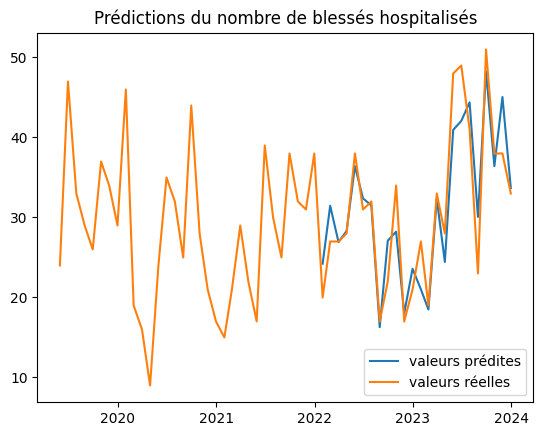

rmse 41.67577455330593


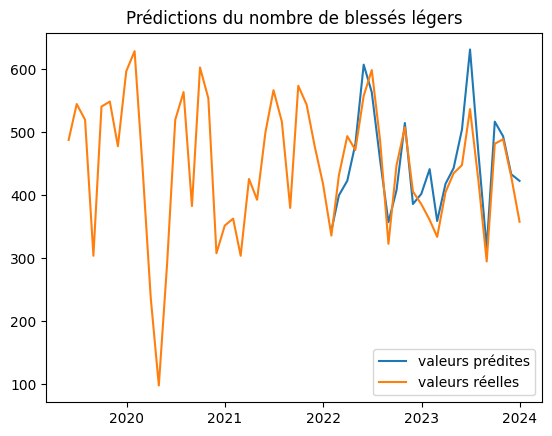

rmse 1.708335310170193


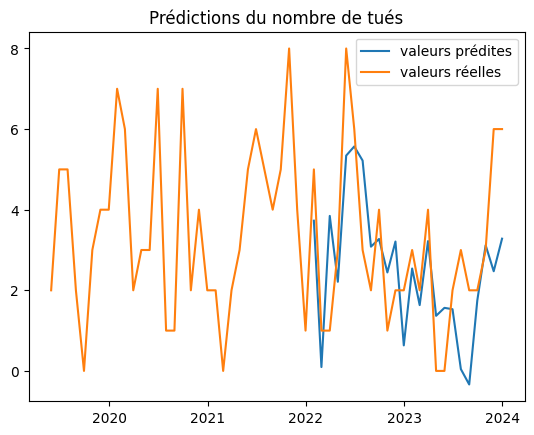

In [34]:
model= LinearRegression()

# Hospitalisé
X_hospitalisé_train = X_hospitalisé.iloc[: -24]
X_hospitalisé_test = X_hospitalisé.iloc[-24:]

y_hospitalisé_train = y_hospitalisé[:-24]
y_hospitalisé_test = y_hospitalisé.iloc[-24:]


model.fit(X_hospitalisé_train, y_hospitalisé_train)

pred_test_hospitalisé = model.predict(X_hospitalisé_test)

print ('rmse', root_mean_squared_error(pred_test_hospitalisé, y_hospitalisé_test))

plt.plot(y_hospitalisé_test.index, pred_test_hospitalisé, label = 'valeurs prédites')
plt.plot(y_hospitalisé.index, y_hospitalisé, label = 'valeurs réelles')
plt.title('Prédictions du nombre de blessés hospitalisés')
plt.legend()
plt.show();

#Léger
X_léger_train = X_léger.iloc[: -24]
X_léger_test = X_léger.iloc[-24:]

y_léger_train = y_léger[:-24]
y_léger_test = y_léger.iloc[-24:]


model.fit(X_léger_train, y_léger_train)

pred_test_léger = model.predict(X_léger_test)

print ('rmse', root_mean_squared_error(pred_test_léger , y_léger_test))

plt.plot(y_léger_test.index, pred_test_léger, label = 'valeurs prédites')
plt.plot(y_léger.index, y_léger, label = 'valeurs réelles')
plt.title('Prédictions du nombre de blessés légers')
plt.legend()
plt.show();

# Tué
X_tué_train = X_tué.iloc[: -24]
X_tué_test = X_tué.iloc[-24:]

y_tué_train = y_tué[:-24]
y_tué_test = y_tué.iloc[-24:]


model.fit(X_tué_train, y_tué_train)

pred_test_tué = model.predict(X_tué_test)

print ('rmse', root_mean_squared_error(pred_test_tué, y_tué_test))

plt.plot(y_tué_test.index, pred_test_tué, label = 'valeurs prédites')
plt.plot(y_tué.index, y_tué, label = 'valeurs réelles')
plt.title('Prédictions du nombre de tués')
plt.legend()
plt.show();

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

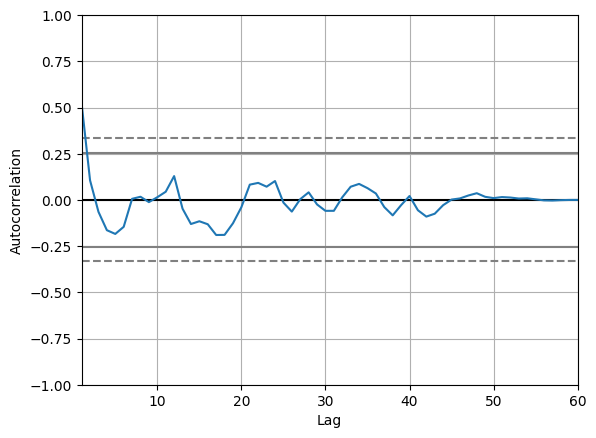

In [37]:

datalog = np.log(df_temp_resampled['blessé_léger'])
pd.plotting.autocorrelation_plot(datalog)

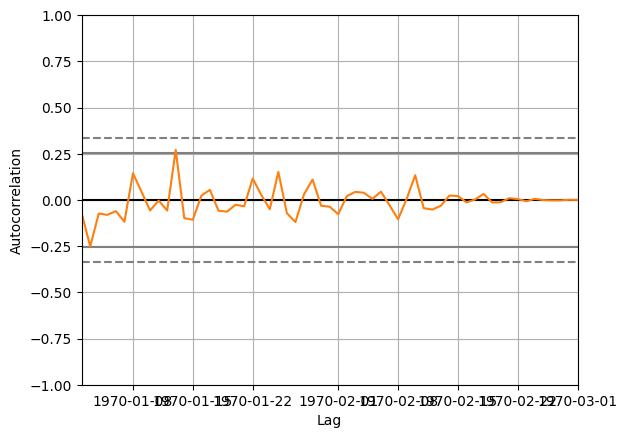

In [38]:
# Différenciation simple
datalog_1 = datalog.diff(1).dropna()
plt.plot(datalog_1)
pd.plotting.autocorrelation_plot(datalog_1);

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

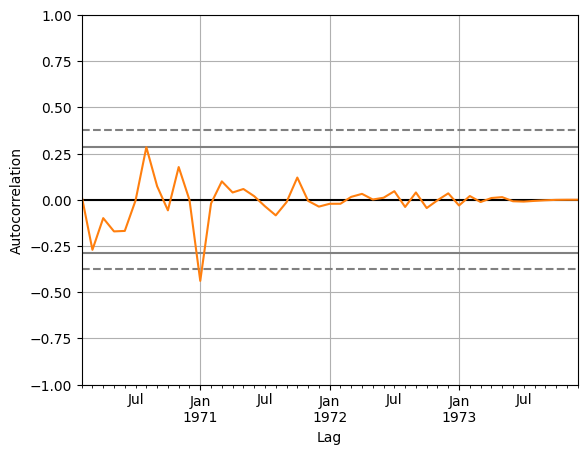

In [39]:
# Différenciation d'ordre 12
datalog_2 = datalog_1.diff(periods = 12).dropna()
datalog_2.plot()
pd.plotting.autocorrelation_plot(datalog_2)


In [40]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(datalog_2))

#Statistique ADF = -5.2036 < Valeurs critiques à 1%, 5%, et 10%
#P-valeur = 8,64 e-06 . Elle est inférieure à 0.05 → On rejette l’hypothèse nulle (H0).Cela signifie que la série n’a pas de racine unitaire, donc elle est stationnaire.

(-5.446522624665156, 2.7028494354901768e-06, 4, 42, {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}, 7.318244071921242)


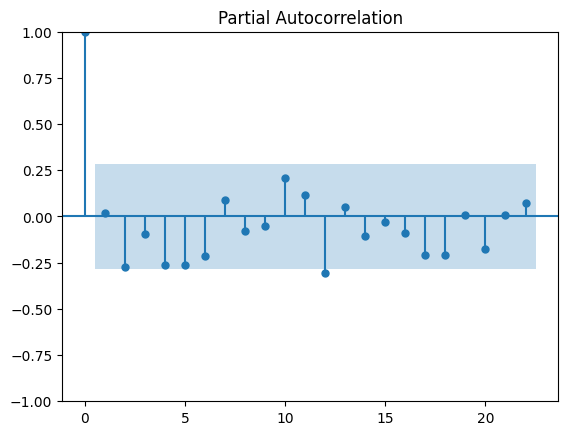

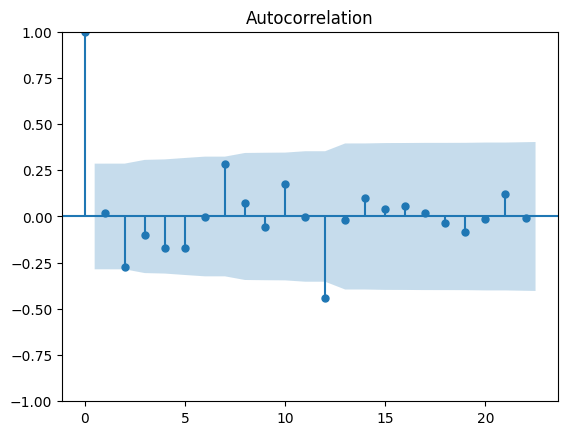

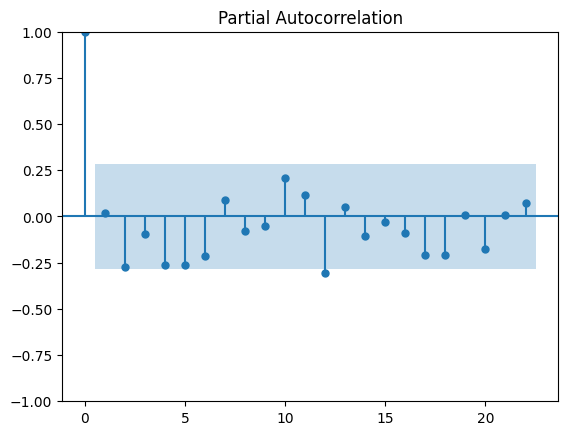

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(datalog_2, lags = 22)
plot_pacf(datalog_2, lags = 22)

In [42]:
model = sm.tsa.SARIMAX(datalog, order = (1,1,1), seasonal_order = (0,1,1,12))
model_fitted = model.fit()
print(model_fitted.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                       blessé_léger   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  -1.713
Date:                            Thu, 06 Feb 2025   AIC                             11.426
Time:                                    16:38:13   BIC                             18.827
Sample:                                01-31-2019   HQIC                            14.211
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5926      0.143      4.135      0.000       0.312       0.874
ma.L1         -0.9920      2.061   

Faudrait il enlever l'année 2020 du covid?